In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# clean data before analysis
def clean_data(data):
    data = data.replace([np.inf, -np.inf], np.nan)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

    data.drop_duplicates(inplace=True)

    null_columns = data.columns[data.isnull().sum() == len(data)]
    data.drop(columns=null_columns, inplace=True)

    return data

In [3]:
def perform_eda(data, location_name):
    data = clean_data(data)

    if data.empty:
        print(f"No data available after cleaning for {location_name}.")
        return

    data.set_index('Timestamp', inplace=True)

    # 1. Summary Statistics
    summary_stats = data.describe()
    print(f"\nSummary statistics for {location_name}:")
    print(summary_stats)

    # 2. Data Quality Check
    missing_values = data.isnull().sum()
    print(f"\nMissing values for {location_name}:")
    print(missing_values)

    # 3. Time Series Analysis
    variables = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[variables])
    plt.title(f"Time-series trends for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

    # 4. Correlation Analysis
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {location_name}")
    plt.show()

    # 5. Wind Analysis
    wind_variables = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[wind_variables])
    plt.title(f"Wind Speed and Direction for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

    # 6. Temperature Analysis
    temp_variables = ['TModA', 'TModB', 'Tamb']
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[temp_variables])
    plt.title(f"Module and Ambient Temperatures for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.show()

    # 7. Histograms
    histogram_variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
    for var in histogram_variables:
        plt.figure(figsize=(12, 6))
        sns.histplot(data[var], kde=True)
        plt.title(f"Histogram of {var} for {location_name}")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.show()

    # 8. Box Plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[variables])
    plt.title(f"Box Plot for {location_name}")
    plt.show()

    # 9. Scatter Plots
    scatter_pairs = [('GHI', 'Tamb'), ('WS', 'WSgust')]
    for x, y in scatter_pairs:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=data, x=x, y=y, hue='Precipitation', palette='viridis', s=20)
        plt.title(f"Scatter Plot of {x} vs {y} for {location_name}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

In [4]:
# load CSV data
def load_csv_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print(f"Error: File not found - {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse CSV data - {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while loading data from {file_path}: {e}")
        return None


Summary statistics for Benin - Malanville:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


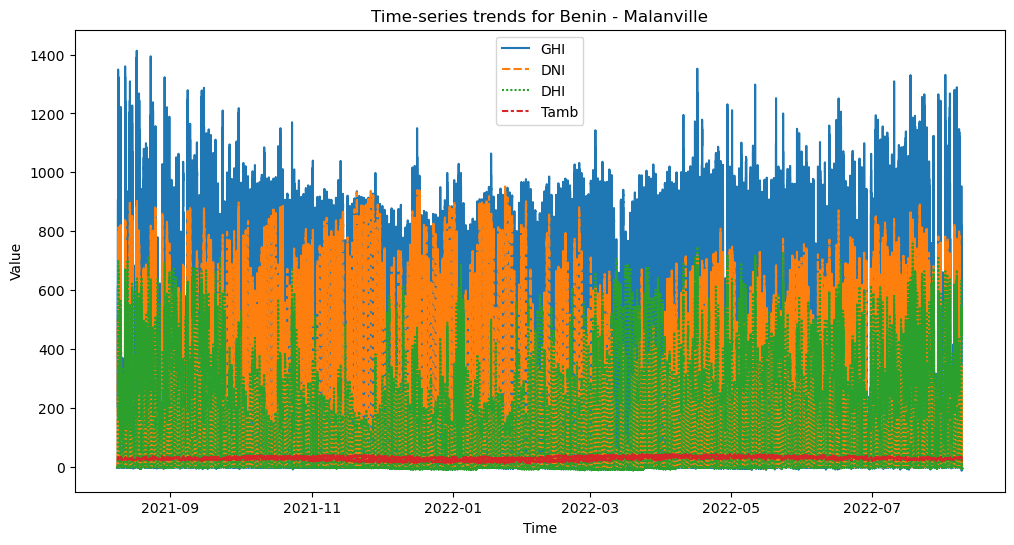

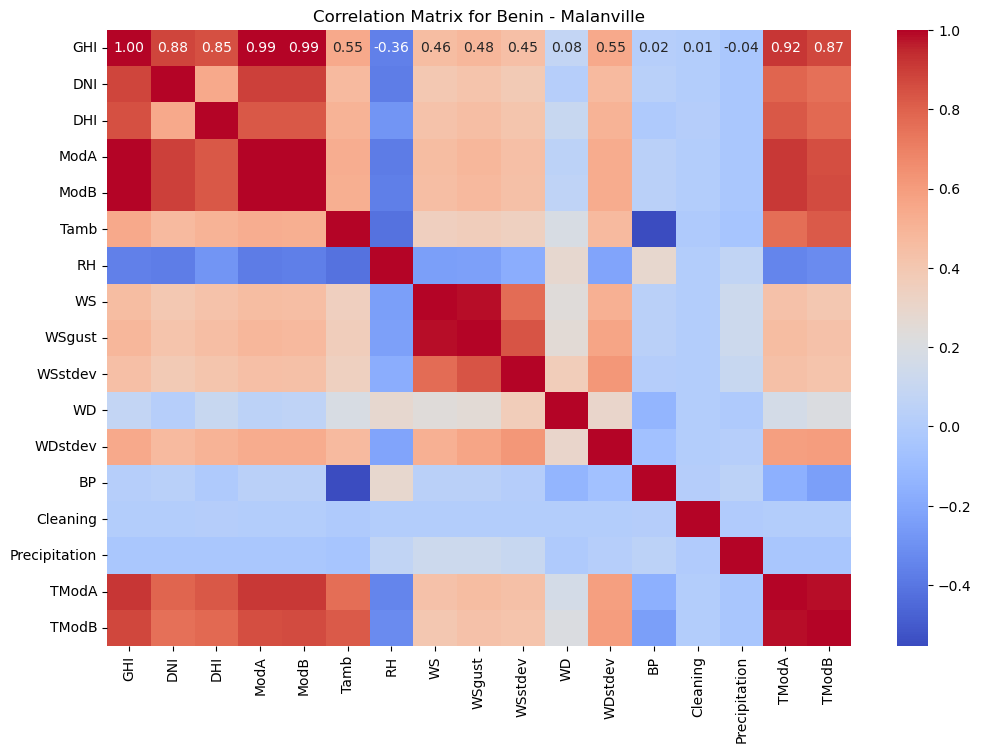

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


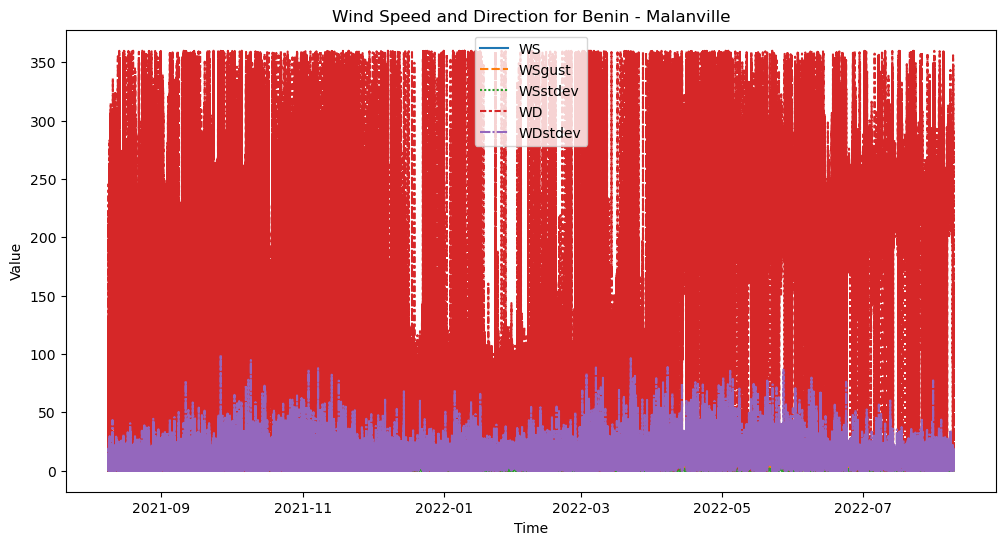

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


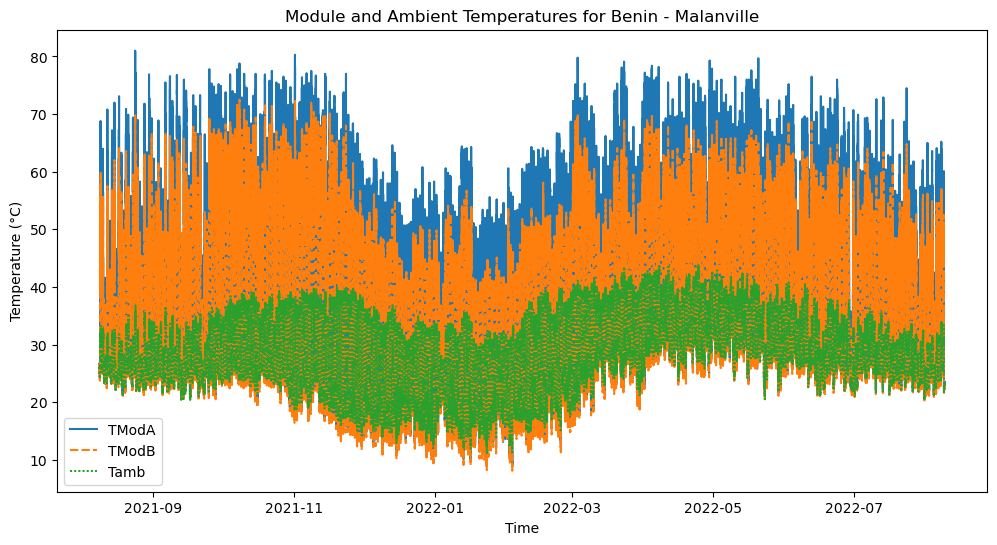

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


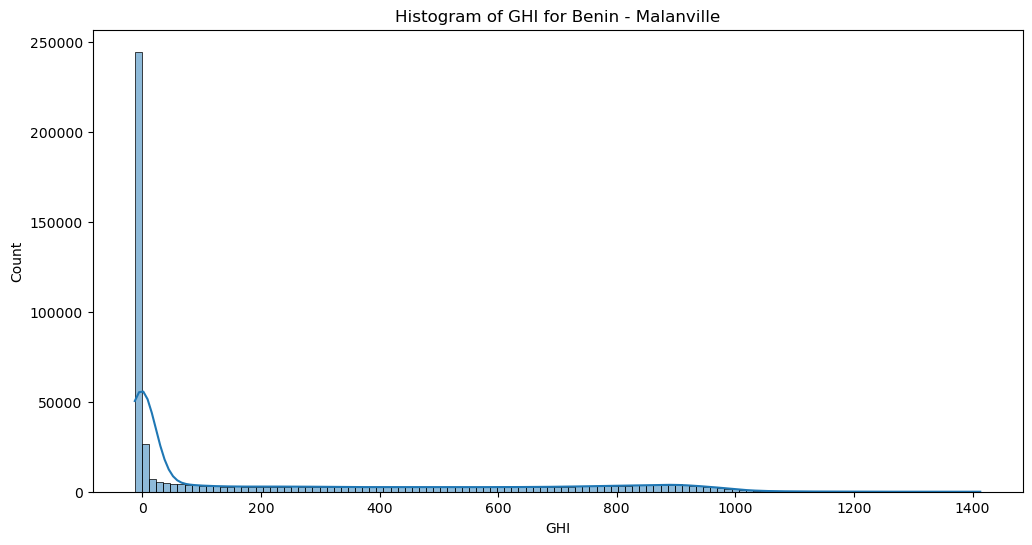

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


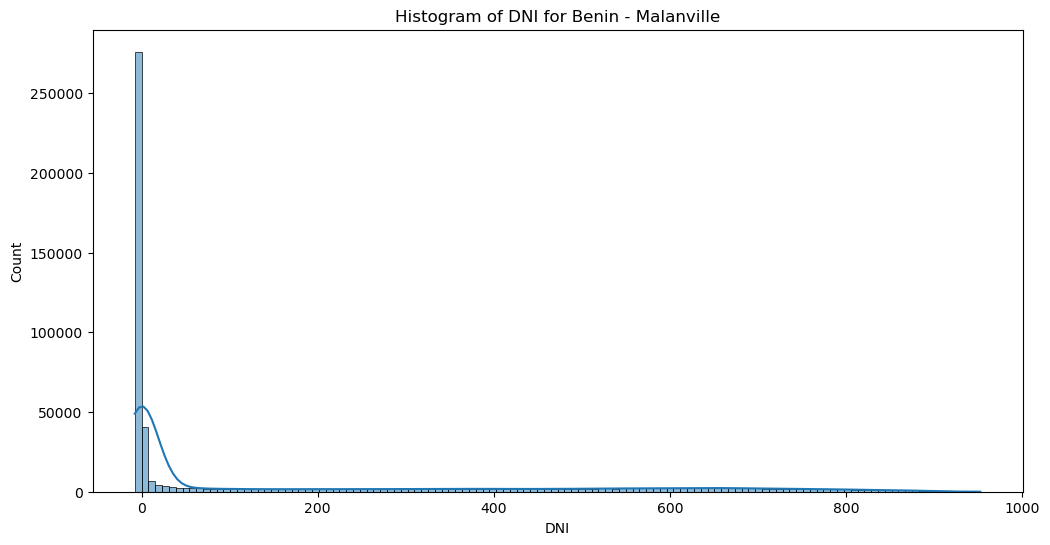

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


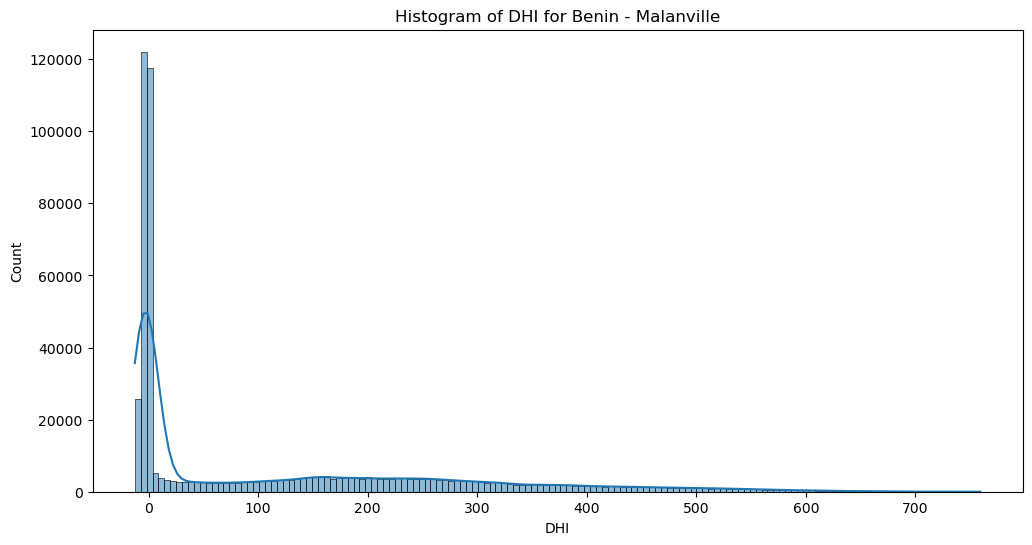

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


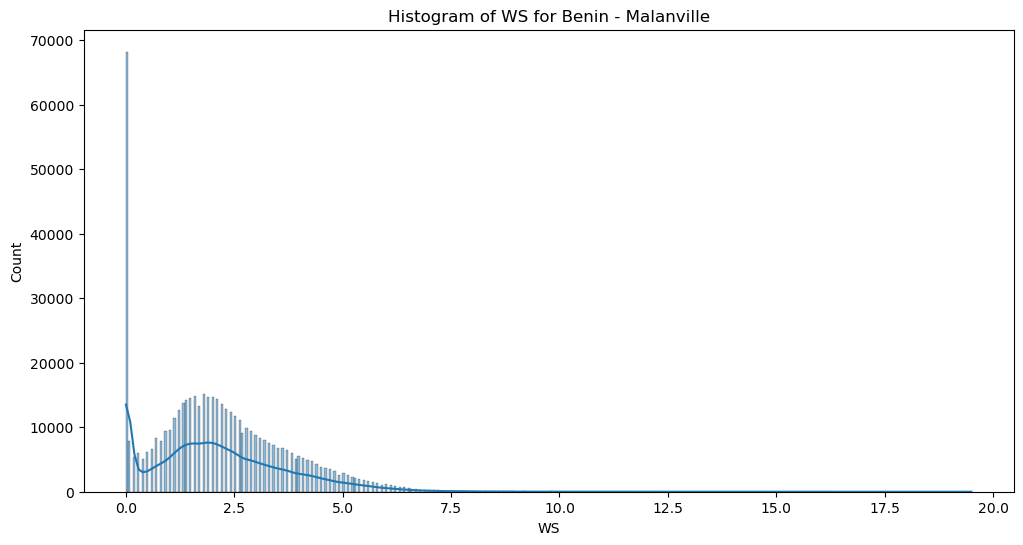

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


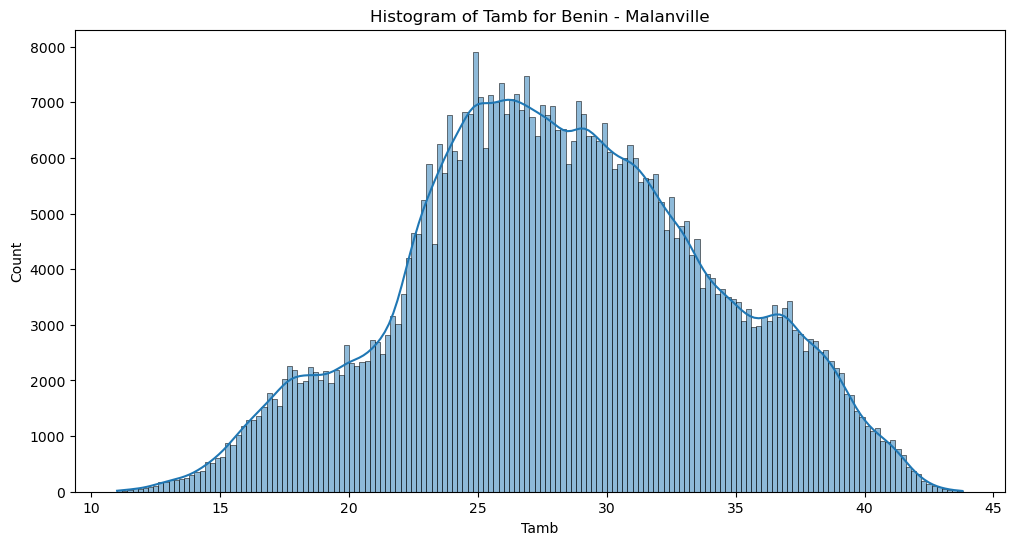

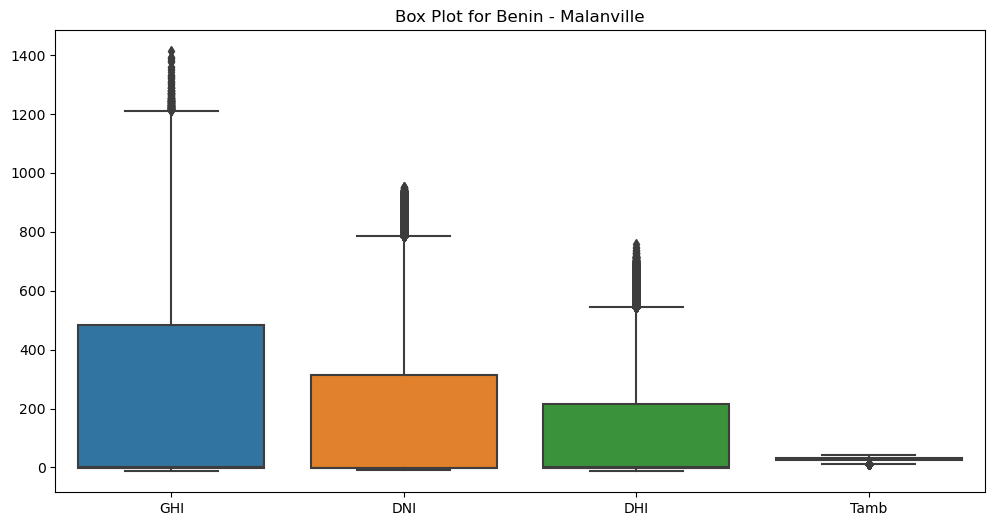

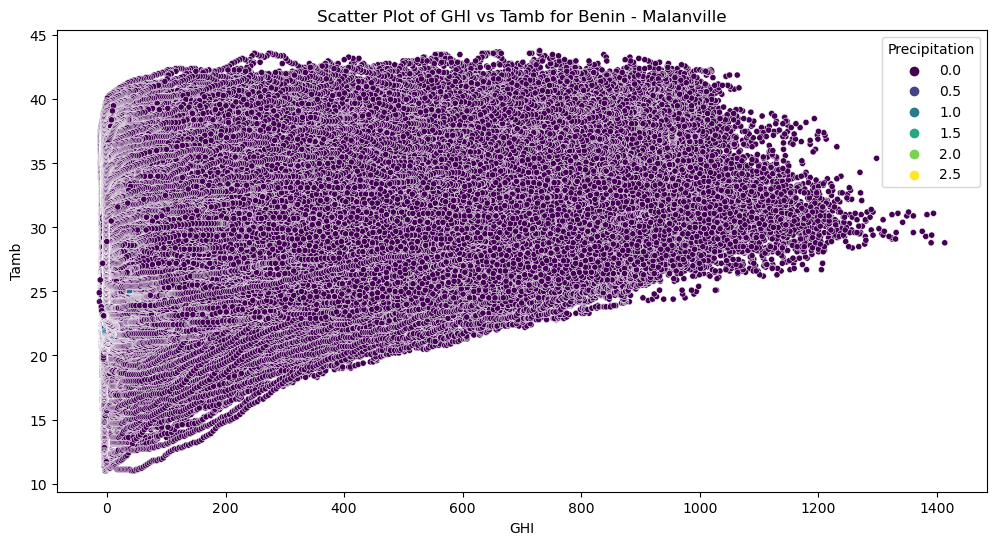

In [ ]:
# Load data from CSV files with error handling
benin_data = load_csv_data("../data/benin-malanville.csv")
sierra_leone_data = load_csv_data("../data/sierraleone-bumbuna.csv")
togo_data = load_csv_data("../data/togo-dapaong_qc.csv")

# EDA to each dataset
if benin_data is not None:
    perform_eda(benin_data, "Benin - Malanville")
if sierra_leone_data is not None:
    perform_eda(sierra_leone_data, "Sierra Leone - Bumbuna")
if togo_data is not None:
    perform_eda(togo_data, "Togo - Dapaong QC")